In [651]:
from sklearn import manifold
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [652]:
data = loadmat('/home/desktop/Desktop/22104412_Docs/EEG-COGMusic/DA-AFNet/datasets/Zscore_clipped/s02_datasets_Zscore_clipped.mat')

x_c=data['coh']
x_p = data['pli']
x_d = data['psd']
labels_skf = data['labels_kfold']
labels = data['valence']
de = data['EEGNet']

In [653]:
x_n = np.zeros((40,75,32,32,5))
for trial in range(x_n.shape[0]):
    for sample in range(x_n.shape[1]):
        x_n[trial,sample,:,:,0] = x_c[trial,sample,:,:,0]+np.transpose(x_p[trial,sample,:,:,0])
        x_n[trial,sample,:,:,1] = x_c[trial,sample,:,:,1]+np.transpose(x_p[trial,sample,:,:,1])
        x_n[trial,sample,:,:,2] = x_c[trial,sample,:,:,2]+np.transpose(x_p[trial,sample,:,:,2])
        x_n[trial,sample,:,:,3] = x_c[trial,sample,:,:,3]+np.transpose(x_p[trial,sample,:,:,3])
        x_n[trial,sample,:,:,4] = x_c[trial,sample,:,:,4]+np.transpose(x_p[trial,sample,:,:,4])
    print(f'Completed trial {trial}')

for trial in range(x_n.shape[0]):
    for sample in range(x_n.shape[1]):
        for i in range(32):
            x_n[trial,sample,i,i,:] = x_d[trial,sample,i,:]
    print(f'Completed trial {trial}')

Completed trial 0
Completed trial 1
Completed trial 2
Completed trial 3
Completed trial 4
Completed trial 5
Completed trial 6
Completed trial 7
Completed trial 8
Completed trial 9
Completed trial 10
Completed trial 11
Completed trial 12
Completed trial 13
Completed trial 14
Completed trial 15
Completed trial 16
Completed trial 17
Completed trial 18
Completed trial 19
Completed trial 20
Completed trial 21
Completed trial 22
Completed trial 23
Completed trial 24
Completed trial 25
Completed trial 26
Completed trial 27
Completed trial 28
Completed trial 29
Completed trial 30
Completed trial 31
Completed trial 32
Completed trial 33
Completed trial 34
Completed trial 35
Completed trial 36
Completed trial 37
Completed trial 38
Completed trial 39
Completed trial 0
Completed trial 1
Completed trial 2
Completed trial 3
Completed trial 4
Completed trial 5
Completed trial 6
Completed trial 7
Completed trial 8
Completed trial 9
Completed trial 10
Completed trial 11
Completed trial 12
Completed tri

In [654]:
v = labels_skf[:,0]
i1 = np.where((v<4.5))[0]
i2 = np.where((v>5.5))[0]

In [655]:
dt1 = x_n[i1]
l1 = labels[i1]
dt2 = x_n[i2]
l2 = labels[i2]

In [656]:
de1 = de.transpose((0,1,3,2))
de1 = de[i1,:,:,:]
de2 = de[i2,:,:,:]

In [657]:
dt1.shape, l1.shape, de1.shape, de2.shape,l2.shape,dt2.shape

((11, 75, 32, 32, 5),
 (11, 75, 2),
 (11, 75, 32, 384),
 (20, 75, 32, 384),
 (20, 75, 2),
 (20, 75, 32, 32, 5))

In [658]:
indl = random.sample(range(dt1.shape[0]), 2)
indh = random.sample(range(dt2.shape[0]), 2)

In [659]:
indl, indh

([4, 8], [19, 8])

In [660]:
# indl,indh = ([8, 5], [13, 19])
indl,indh = ([7, 0], [14, 17])

In [661]:
dt_n1 = dt1[indl,:,:,:,:]
dt_n2 = dt2[indh,:,:,:,:]
l_n1 = l1[indl]
l_n2 = l2[indh]
de_n1 = de1[indl,:,:,:]
de_n2 = de2[indh,:,:,:]

In [662]:
c_low1 = np.zeros((75,1))
c_low2 = np.ones((75,1))
c_high1 = np.zeros((75,1))
c_high1[:,0] = 2
c_high2 = np.ones((75,1))
c_high2[:,0] = 3

y = np.concatenate((c_low1,c_low2,c_high1,c_high2),axis=0)
y.shape

(300, 1)

In [663]:
y[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3.

In [664]:
dt_n1 = np.concatenate((dt_n1),axis=0)
dt_n2 = np.concatenate((dt_n2),axis=0)
de_n1 = np.concatenate((de_n1),axis=0)
de_n2 = np.concatenate((de_n2),axis=0)

dt_n1.shape, dt_n2.shape, de_n1.shape, de_n2.shape

((150, 32, 32, 5), (150, 32, 32, 5), (150, 32, 384), (150, 32, 384))

In [665]:
low_feat = dt_n1.reshape(150,-1)
low_time = de_n1.reshape(150,-1)
high_feat = dt_n2.reshape(150,-1)
high_time = de_n2.reshape(150,-1)

low_feat.shape, low_time.shape, high_feat.shape, high_time.shape

((150, 5120), (150, 12288), (150, 5120), (150, 12288))

In [666]:
low_X = np.concatenate((low_feat,low_time),axis=1)
high_X = np.concatenate((high_feat,high_time),axis=1)

low_X.shape, high_X.shape

((150, 17408), (150, 17408))

In [667]:
X = np.concatenate((low_feat,high_feat),axis=0)
X.shape

(300, 5120)

In [668]:
y.shape

(300, 1)

/tmp/ipykernel_6963/276233238.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 4))


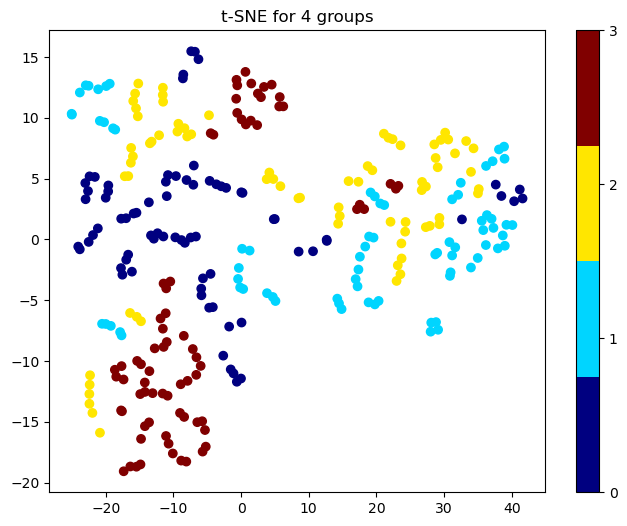

In [669]:
# Perform t-SNE
tsne = manifold.TSNE(n_components=2, random_state=0, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 4))
plt.colorbar(ticks=range(4))
plt.title("t-SNE for 4 groups")
plt.show()

/tmp/ipykernel_6963/2481650469.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 4))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


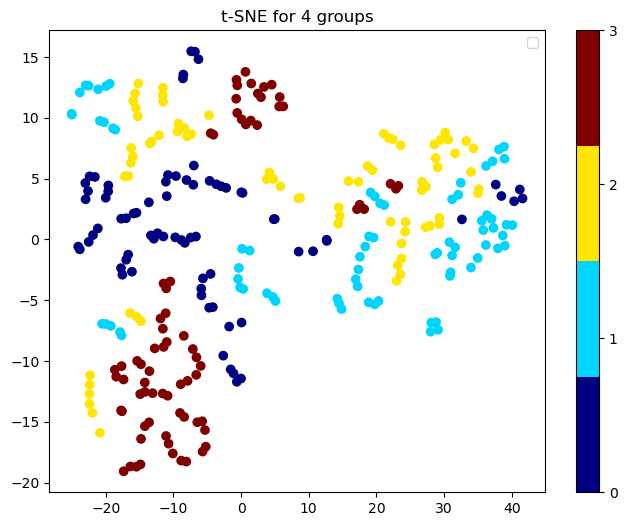

In [670]:
# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 4))
plt.legend(loc='best')
plt.colorbar(ticks=range(4))
plt.title("t-SNE for 4 groups")
plt.show()

/tmp/ipykernel_6963/1429908106.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_embedded[y_n == cls, 0], X_embedded[y_n == cls, 1], cmap=plt.cm.get_cmap("jet", 4)) # Add labels for classes
/tmp/ipykernel_6963/1429908106.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[y_n == cls, 0], X_embedded[y_n == cls, 1], cmap=plt.cm.get_cmap("jet", 4)) # Add labels for classes


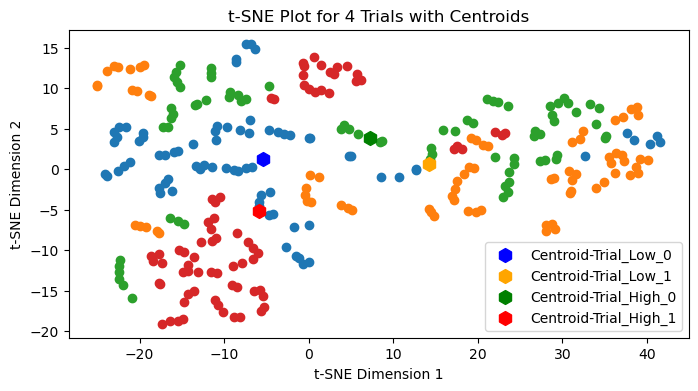

In [671]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_embedded = X_tsne
y_n = y[:,0]

# Step 2: Compute centroids
centroids = []
unique_classes = np.unique(y_n)
for cls in unique_classes:
    cls_points = X_embedded[y_n == cls]
    centroid = cls_points.mean(axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

# Step 3: Plot t-SNE embeddings and centroids
plt.figure(figsize=(8, 4))
for cls in unique_classes:
    v = int(cls)
    # titles = ['Low_Valence_1','Low_Valence_2','High_Valence_1','High_Valence_2']
    # val = titles[v] 
    plt.scatter(X_embedded[y_n == cls, 0], X_embedded[y_n == cls, 1], cmap=plt.cm.get_cmap("jet", 4)) # Add labels for classes

# Add centroids to the plot


plt.scatter(centroids[0, 0], centroids[0, 1], color='blue', 
            label='Centroid-Trial_Low_0', marker='h', s=100)
plt.scatter(centroids[1, 0], centroids[1, 1], color='orange', 
            label='Centroid-Trial_Low_1', marker='h', s=100)
plt.scatter(centroids[2, 0], centroids[2, 1], color='green', 
            label='Centroid-Trial_High_0', marker='h', s=100)
plt.scatter(centroids[3, 0], centroids[3, 1], color='red', 
            label='Centroid-Trial_High_1', marker='h', s=100)

# Add a legend
plt.legend(loc='lower right')  # Automatically place the legend
plt.title("t-SNE Plot for 4 Trials with Centroids")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

plt.savefig("plot.pdf", format="pdf")

# Display the plot
plt.show()

plt.show()


/tmp/ipykernel_6963/2634354372.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("jet", 4))
/tmp/ipykernel_6963/2634354372.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_embedded[y_n == cls, 0], X_embedded[y_n == cls, 1],


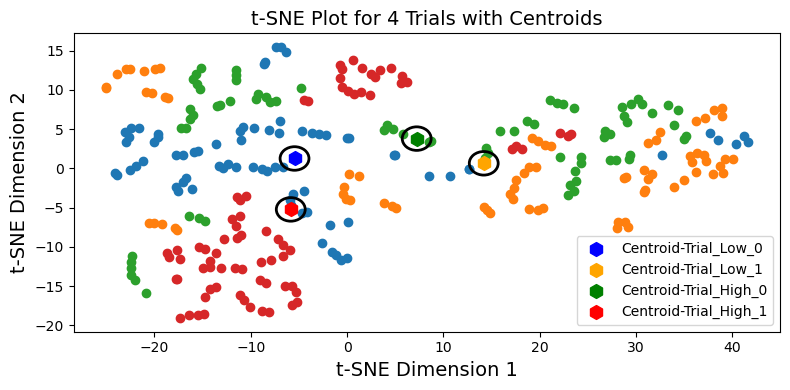

In [677]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

X_embedded = X_tsne
y_n = y[:, 0]

# Step 2: Compute centroids
centroids = []
unique_classes = np.unique(y_n)
for cls in unique_classes:
    cls_points = X_embedded[y_n == cls]
    centroid = cls_points.mean(axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

# Step 3: Plot t-SNE embeddings and centroids
fig, ax = plt.subplots(figsize=(8, 4))

for cls in unique_classes:
    v = int(cls)
    ax.scatter(X_embedded[y_n == cls, 0], X_embedded[y_n == cls, 1],
               cmap=plt.cm.get_cmap("jet", 4))

# Add centroids to the plot
colors = ['blue', 'orange', 'green', 'red']
labels = ['Centroid-Trial_Low_0', 'Centroid-Trial_Low_1', 'Centroid-Trial_High_0', 'Centroid-Trial_High_1']

for i, (cx, cy) in enumerate(centroids):
    ax.scatter(cx, cy, color=colors[i], label=labels[i], marker='h', s=100)
    
    # Add circle around the centroid
    circle = Circle((cx, cy), radius=1.5, color='black', fill=False, linewidth=2, linestyle='-')
    ax.add_patch(circle)

# Add legend and labels
ax.legend(loc='lower right', fontsize = 10)
ax.set_title("t-SNE Plot for 4 Trials with Centroids", fontsize = 14)
ax.set_xlabel("t-SNE Dimension 1", fontsize = 14)
ax.set_ylabel("t-SNE Dimension 2", fontsize = 14)

plt.tight_layout()
plt.savefig("plot.pdf", format="pdf")
plt.show()